In [1]:
import pandas as pd

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

x_train = train_set.drop(['median_house_value'], axis=1)
y_train = train_set['median_house_value']

x_test = test_set.drop(['median_house_value'], axis=1)
y_test = test_set['median_house_value']

In [4]:
x_train,y_train

(       longitude  latitude  housing_median_age  total_rooms  median_income  \
 0       0.199203  0.852285            0.294118     0.071094       0.096557   
 1       0.272908  0.480340            0.392157     0.135219       0.351285   
 2       0.816733  0.170032            0.333333     0.084092       0.173377   
 3       0.704183  0.031881            0.784314     0.035967       0.167632   
 4       0.311753  0.625930            0.372549     0.052093       0.278403   
 ...          ...       ...                 ...          ...            ...   
 15319   0.023904  0.891605            0.313725     0.042097       0.156136   
 15320   0.383466  0.510096            0.294118     0.031515       0.203859   
 15321   0.190239  0.550478            0.921569     0.067889       0.238383   
 15322   0.339641  0.709883            0.215686     0.033449       0.241810   
 15323   0.667331  0.170032            0.156863     0.098464       0.550613   
 
        <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR 

In [5]:
def dot_product(a,b):
    c=0
    for i in range(len(a)):
        c+=a[i]*b[i]
    return c

In [6]:
def cost(w,b):
    cost=0
    for i in range(len(x_train)):
        cost+=(dot_product(list(x_train.iloc[i]),w)+b-y_train.iloc[i])**2
    return cost/2*len(x_train)

In [7]:
def derivative_x(w,b,j):
    derivative=0
    for i in range(len(x_train)):
        derivative+=(dot_product(list(x_train.iloc[i]),w)+b-y_train.iloc[i])*(x_train.iloc[i,j])
    return derivative/len(x_train)

def derivative_b(w,b):
    derivative=0
    for i in range(len(x_train)):
        derivative+=(dot_product(list(x_train.iloc[i]),w)+b-y_train.iloc[i])
    return derivative/len(x_train)

In [8]:
def gradient_decent(w,b,lr):
    w_new=w
    b_new=b
    for j in range(len(x_train.iloc[0])):
        w_new[j]=w_new[j]-lr*(derivative_x(w,b,j))
    b_new=b_new-lr*derivative_b(w,b)
    return w_new,b_new

In [9]:
w=[0]*12
b=0
for epoch in range(50):
    w,b=gradient_decent(w,b,5)
    if((epoch+1)%5==0):
        print("Epoch : ",epoch+1 ," , Cost : ",cost(w,b))

Epoch :  5  , Cost :  1.2274020244333514e+18
Epoch :  10  , Cost :  1.0572002034537962e+18
Epoch :  15  , Cost :  9.892106588215284e+17
Epoch :  20  , Cost :  9.413960431384554e+17
Epoch :  25  , Cost :  8.968565785657992e+17
Epoch :  30  , Cost :  8.52887447371101e+17
Epoch :  35  , Cost :  8.10554392208551e+17
Epoch :  40  , Cost :  7.713219330916307e+17
Epoch :  45  , Cost :  7.361462419534772e+17
Epoch :  50  , Cost :  7.05398884820481e+17


In [10]:
y_hat=[0]*len(x_test)
for i in range(len(x_test)):
    y_hat[i]=dot_product(w,x_test.iloc[i])+b

C:\Users\45rud\AppData\Local\Temp\ipykernel_24872\20508677.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c+=a[i]*b[i]


In [12]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("Mean absolute error:", mean_absolute_error(y_test, y_hat))
print("Mean squared error:", mean_squared_error(y_test, y_hat))
print("R² score:", r2_score(y_test, y_hat))

Mean absolute error: 58861.10851096954
Mean squared error: 6093662259.464143
R² score: 0.538493275464599


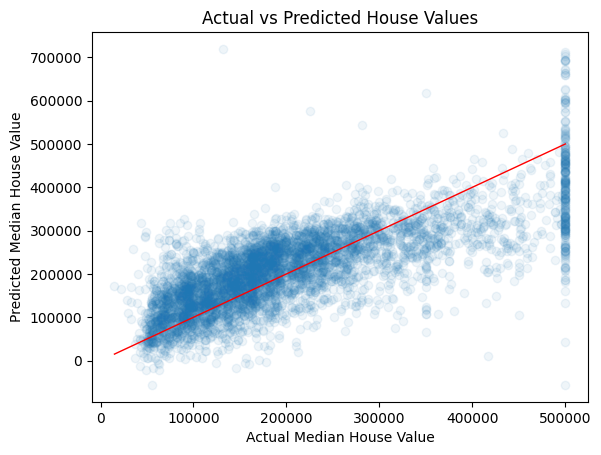

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_hat, alpha=0.07)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=1)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()